#### [Chapter 3](https://github.com/Ziaeemehr/netsci/blob/main/examples/chap_03.ipynb)

#### **Random Networks**

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/netsci/blob/main/examples/chap_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A random network consists of N nodes where each node pair is connected with probability p.
To construct a random network we follow these steps:
1) Start with N isolated nodes.
2) Select a node pair and generate a random number between 0 and 1. If the number exceeds p, connect the selected node pair with a link, otherwise leave them disconnected.
3) Repeat step (2) for each of the N(N-1)/2 node pairs.


In [1]:
import random
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from netsci.plot import plot_graph

In [2]:
LABELSIZE = 13
plt.rc('axes', labelsize=LABELSIZE)
plt.rc('axes', titlesize=LABELSIZE)
plt.rc('figure', titlesize=LABELSIZE)
plt.rc('legend', fontsize=LABELSIZE)
plt.rc('xtick', labelsize=LABELSIZE)
plt.rc('ytick', labelsize=LABELSIZE)


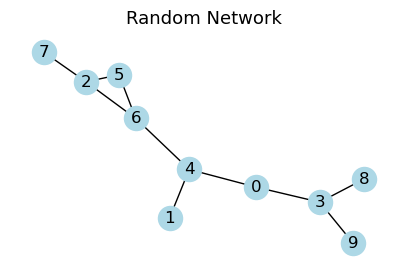

In [3]:

def create_random_network(N, p):
    G = nx.Graph()  # Initialize an empty graph
    G.add_nodes_from(range(N))  # Add N isolated nodes

    # Iterate through each possible node pair
    for i in range(N):
        for j in range(i + 1, N):
            if random.random() <= p:  # Generate a random number and compare it with p
                G.add_edge(i, j)  # Connect the nodes if the condition is met

    return G

# Example usage:
N = 10  # Number of nodes
p = 0.3  # Probability of edge creation

seed=2
random.seed(seed)
np.random.seed(seed)

random_network = create_random_network(N, p)
plot_graph(random_network, seed=2, figsize=(5, 3), title="Random Network")

# Drawing the network
plt.title("Random Network")
plt.show()


Other option would be to use the `nx.gnp_random_graph` function from NetworkX, which generates random graphs with a given number of nodes and a given probability of edge creation.

```python
G = nx.gnp_random_graph(N, p)
```


#### Binimial distribution

Degree distribution in a random network follows a binomial distribution.

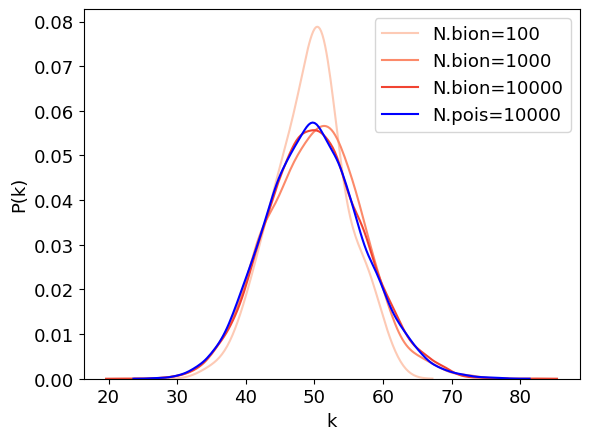

In [23]:
# make a random graph with 100 nodes and average degree of 50 
np.random.seed(2)

num_nodes = [100, 1000, 10000]
average_degree = 50
lambd = 50
colors1 = plt.cm.Reds(np.linspace(0.2, 0.6, len(num_nodes)))

for i in range(len(num_nodes)):
    probability = average_degree / num_nodes[i]
    graph_b = nx.gnp_random_graph(num_nodes[i], probability)
    degrees = [d for n, d in graph_b.degree()]
    sns.kdeplot(degrees, fill=False, label=f"N.bion={num_nodes[i]}", color=colors1[i])

s = np.random.poisson(lambd, num_nodes[-1])
sns.kdeplot(s, fill=False, label=f"N.pois={num_nodes[i]}", color='b')

plt.xlabel("k")
plt.ylabel("P(k)")
plt.legend();